# MDN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim
import torch.nn as nn
from torch.autograd import Variable

In [2]:
def generate_data(n_samples):
    epsilon = np.random.normal(size=(n_samples))
    x_data = np.random.uniform(-10.5, 10.5, n_samples)
    y_data = 7*np.sin(0.75*x_data) + 0.5*x_data + epsilon
    return x_data, y_data

n_samples = 1000
x_data, y_data = generate_data(n_samples)

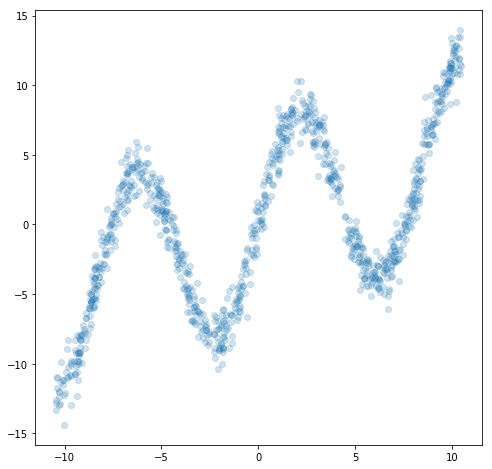

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.2)
plt.show()

In [4]:
n_input = 1
n_hidden = 20
n_output = 1

network = nn.Sequential(nn.Linear(n_input, n_hidden),
                        nn.Tanh(),
                        nn.Linear(n_hidden, n_output))
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

In [5]:
x_tensor = torch.from_numpy(np.float32(x_data).reshape(n_samples, n_input))
y_tensor = torch.from_numpy(np.float32(y_data).reshape(n_samples, n_input))

In [6]:
x_variable = Variable(x_tensor)
y_variable = Variable(y_tensor, requires_grad=False)

In [7]:
def train():
    for epoch in range(30000):
        y_pred = network(x_variable)
        loss = loss_fn(y_pred, y_variable)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 300 == 0:
            print(epoch, loss)

In [8]:
train()

0 tensor(39.9044, grad_fn=<MseLossBackward>)
300 tensor(23.7326, grad_fn=<MseLossBackward>)
600 tensor(22.8470, grad_fn=<MseLossBackward>)
900 tensor(22.4576, grad_fn=<MseLossBackward>)
1200 tensor(22.0351, grad_fn=<MseLossBackward>)
1500 tensor(21.4977, grad_fn=<MseLossBackward>)
1800 tensor(20.8489, grad_fn=<MseLossBackward>)
2100 tensor(20.0436, grad_fn=<MseLossBackward>)
2400 tensor(19.0555, grad_fn=<MseLossBackward>)
2700 tensor(17.7372, grad_fn=<MseLossBackward>)
3000 tensor(16.1058, grad_fn=<MseLossBackward>)
3300 tensor(14.3927, grad_fn=<MseLossBackward>)
3600 tensor(12.7467, grad_fn=<MseLossBackward>)
3900 tensor(11.2220, grad_fn=<MseLossBackward>)
4200 tensor(9.8368, grad_fn=<MseLossBackward>)
4500 tensor(8.5918, grad_fn=<MseLossBackward>)
4800 tensor(7.4808, grad_fn=<MseLossBackward>)
5100 tensor(6.4960, grad_fn=<MseLossBackward>)
5400 tensor(5.6289, grad_fn=<MseLossBackward>)
5700 tensor(4.8711, grad_fn=<MseLossBackward>)
6000 tensor(4.2139, grad_fn=<MseLossBackward>)
6300 

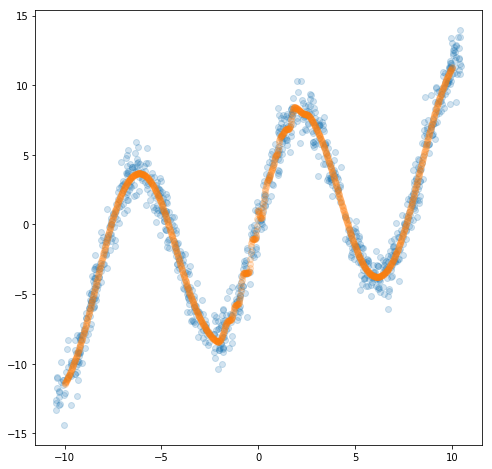

In [9]:
x_test_data = np.linspace(-10, 10, n_samples)

x_test_tensor = torch.from_numpy(np.float32(x_test_data).reshape(n_samples, n_input))
x_test_variable = Variable(x_test_tensor)
y_test_variable = network(x_test_variable)

y_test_data = y_test_variable.data.numpy()

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.2)
plt.scatter(x_test_data, y_test_data, alpha=0.2)
plt.show()

In [10]:
x_variable.data = y_tensor
y_variable.data = x_tensor

train()

x_test_data = np.linspace(-15, 15, n_samples)
x_test_tensor = torch.from_numpy(np.float32(x_test_data).reshape(n_samples, n_input))
x_test_variable.data = x_test_tensor

y_test_variable = network(x_test_variable)

# move from torch back to numpy
y_test_data = y_test_variable.data.numpy()


0 tensor(56.6215, grad_fn=<MseLossBackward>)
300 tensor(25.4371, grad_fn=<MseLossBackward>)
600 tensor(24.9345, grad_fn=<MseLossBackward>)
900 tensor(24.5711, grad_fn=<MseLossBackward>)
1200 tensor(24.1475, grad_fn=<MseLossBackward>)
1500 tensor(23.6741, grad_fn=<MseLossBackward>)
1800 tensor(23.5553, grad_fn=<MseLossBackward>)
2100 tensor(23.4670, grad_fn=<MseLossBackward>)
2400 tensor(23.3979, grad_fn=<MseLossBackward>)
2700 tensor(23.3394, grad_fn=<MseLossBackward>)
3000 tensor(23.2873, grad_fn=<MseLossBackward>)
3300 tensor(23.2403, grad_fn=<MseLossBackward>)
3600 tensor(23.1976, grad_fn=<MseLossBackward>)
3900 tensor(23.1577, grad_fn=<MseLossBackward>)
4200 tensor(23.1189, grad_fn=<MseLossBackward>)
4500 tensor(23.0795, grad_fn=<MseLossBackward>)
4800 tensor(23.0370, grad_fn=<MseLossBackward>)
5100 tensor(22.9870, grad_fn=<MseLossBackward>)
5400 tensor(22.9218, grad_fn=<MseLossBackward>)
5700 tensor(22.8286, grad_fn=<MseLossBackward>)
6000 tensor(22.6996, grad_fn=<MseLossBackward>

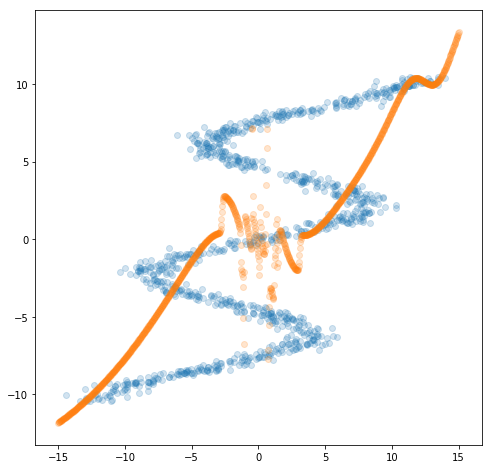

In [11]:
# plot the original data and the test data
plt.figure(figsize=(8, 8))
plt.scatter(y_data, x_data, alpha=0.2)
plt.scatter(x_test_data, y_test_data, alpha=0.2)
plt.show()

In [12]:
class MDN(nn.Module) :
    def __init__(self, n_hidden, n_gaussians) :
        super(MDN, self).__init__()
        self.z_h = nn.Sequential(
        nn.Linear(1, n_hidden),
        nn.Tanh()
        )
        self.z_pi = nn.Linear(n_hidden, n_gaussians)
        self.z_sigma = nn.Linear(n_hidden, n_gaussians)
        self.z_mu = nn.Linear(n_hidden, n_gaussians)
        
    def forward(self, x):
        z_h = self.z_h(x)
        pi = nn.functional.softmax(self.z_pi(z_h), -1)
        sigma = torch.exp(self.z_sigma(z_h))
        mu = self.z_mu(z_h)
        
        return pi, sigma, mu

In [13]:
oneDivSqrtTwoPI = 1.0 / np.sqrt(2 * np.pi)

def gaussian_distribution(y, mu, sigma):
    result = (y.expand_as(mu) - mu) * torch.reciprocal(sigma)
    result = -0.5 * (result * result)
    return (torch.exp(result) * torch.reciprocal(sigma)) * oneDivSqrtTwoPI

In [14]:
def mdn_loss_fn(pi, sigma, mu, y):
    result = gaussian_distribution(y, mu, sigma) * pi
    result = torch.sum(result, dim=1)
    result = -torch.log(result)
    return torch.mean(result)

In [15]:
mdn_x_data = y_data
mdn_y_data = x_data

mdn_x_tensor = y_tensor
mdn_y_tensor = x_tensor

x_variable = Variable(mdn_x_tensor)
y_variable = Variable(mdn_y_tensor, requires_grad=False)

In [16]:
network = MDN(n_hidden=20, n_gaussians=5)
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

def train_mdn():
    for epoch in range(10000):
        pi_variable, sigma_variable, mu_variable = network(x_variable)
        loss = mdn_loss_fn(pi_variable, sigma_variable, mu_variable, y_variable)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(epoch, loss)

In [17]:
train_mdn()

0 tensor(7.2306, grad_fn=<MeanBackward0>)
500 tensor(3.0872, grad_fn=<MeanBackward0>)
1000 tensor(2.8880, grad_fn=<MeanBackward0>)
1500 tensor(2.5174, grad_fn=<MeanBackward0>)
2000 tensor(2.0777, grad_fn=<MeanBackward0>)
2500 tensor(1.9359, grad_fn=<MeanBackward0>)
3000 tensor(1.8722, grad_fn=<MeanBackward0>)
3500 tensor(1.8145, grad_fn=<MeanBackward0>)
4000 tensor(1.7498, grad_fn=<MeanBackward0>)
4500 tensor(1.6631, grad_fn=<MeanBackward0>)
5000 tensor(1.5541, grad_fn=<MeanBackward0>)
5500 tensor(1.4542, grad_fn=<MeanBackward0>)
6000 tensor(1.4158, grad_fn=<MeanBackward0>)
6500 tensor(1.3826, grad_fn=<MeanBackward0>)
7000 tensor(1.3633, grad_fn=<MeanBackward0>)
7500 tensor(1.3480, grad_fn=<MeanBackward0>)
8000 tensor(1.3392, grad_fn=<MeanBackward0>)
8500 tensor(1.3362, grad_fn=<MeanBackward0>)
9000 tensor(1.3436, grad_fn=<MeanBackward0>)
9500 tensor(1.3395, grad_fn=<MeanBackward0>)


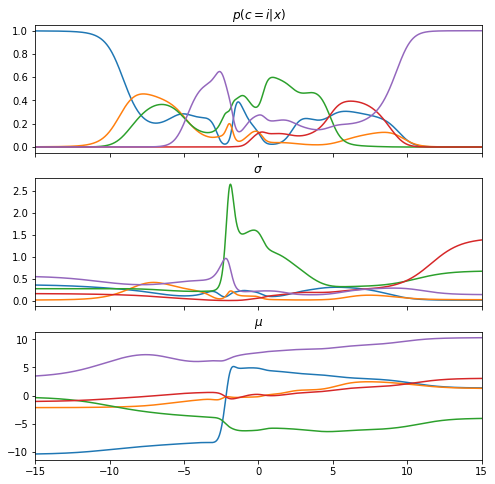

In [18]:
pi_variable, sigma_variable, mu_variable = network(x_test_variable)

pi_data = pi_variable.data.numpy()
sigma_data = sigma_variable.data.numpy()
mu_data = mu_variable.data.numpy()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,8))
ax1.plot(x_test_data, pi_data)
ax1.set_title('$p(c = i | x)$')
ax2.plot(x_test_data, sigma_data)
ax2.set_title('$\sigma$')
ax3.plot(x_test_data, mu_data)
ax3.set_title('$\mu$')
plt.xlim([-15,15])
plt.show()

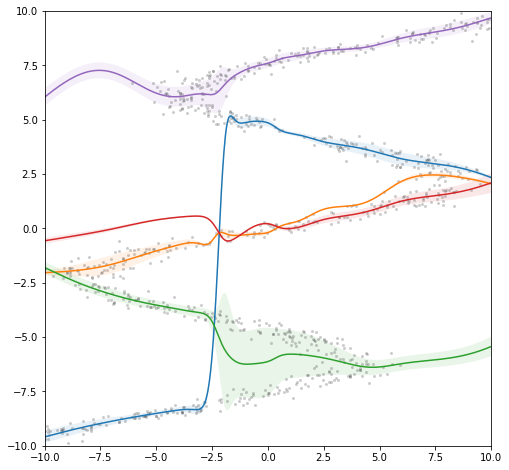

In [19]:
plt.figure(figsize=(8, 8), facecolor='white')
for mu_k, sigma_k in zip(mu_data.T, sigma_data.T):
    plt.plot(x_test_data, mu_k)
    plt.fill_between(x_test_data, mu_k-sigma_k, mu_k+sigma_k, alpha=0.1)
plt.scatter(mdn_x_data, mdn_y_data, marker='.', lw=0, alpha=0.2, c='black')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

In [20]:
def gumbel_sample(x, axis=1):
    z = np.random.gumbel(loc=0, scale=1, size=x.shape)
    return (np.log(x) + z).argmax(axis=axis)

k = gumbel_sample(pi_data)

In [21]:
indices = (np.arange(n_samples), k)
rn = np.random.randn(n_samples)
sampled = rn * sigma_data[indices] + mu_data[indices]

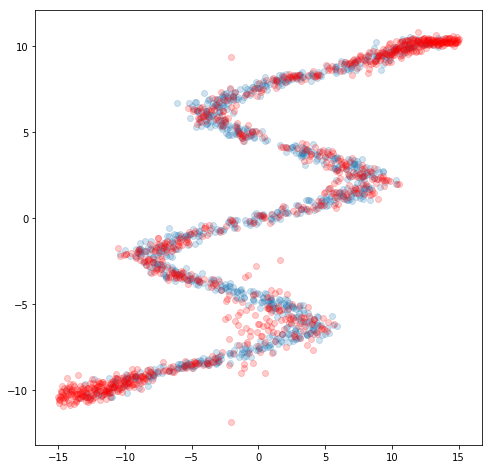

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(mdn_x_data, mdn_y_data, alpha=0.2)
plt.scatter(x_test_data, sampled, alpha=0.2, color='red')
plt.show()